In [1]:
%pylab inline
import scipy.io as sio
from sklearn.neighbors import NearestNeighbors
from sklearn import svm, grid_search, tree
from sklearn.cross_validation import cross_val_predict, cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from IPython.display import IFrame
import csv
import pydot

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = "/Users/kjordan/Desktop/Machine_Learning/ML_Edu_pts/preshortlong_roland_CSTcombo.csv"
data = np.genfromtxt(filename, delimiter=",")
mytext=[]
with open(filename, 'rU') as csvfile:
    readit = csv.reader(csvfile, delimiter=",", dialect=csv.excel_tab)
    for row in readit:
        mytext.append(row)
classnames = ['no_deficit', 'deficit']
featurenames = mytext[0]
data = data[1:,:]
print featurenames
print data.shape

['pre_motor_def', 'pre_sense_def', 'pre_lang_def', 'pre_vision_def', 'pre_slf2', 'pre_slf3', 'pre_arc', 'pre_slftp', 'pre_ilf', 'pre_mdlf', 'pre_ifof', 'pre_unc', 'pre_cst', 'xtra', 'xtra', 'pre_or', 'short_motor_def', 'short_sense_def', 'short_lang_def', 'short_vision_def', 'short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc', 'short_cst', 'xtra', 'xtra', 'short_or', 'long_motor_def', 'long_sense_def', 'long_lang_def', 'long_vision_def', 'long_slf2', 'long_slf3', 'long_arc', 'long_slftp', 'long_ilf', 'long_mdlf', 'long_ifof', 'long_unc', 'long_cst', 'xtra', 'xtra', 'long_or']
(33, 48)


In [3]:
def doforest(x,y,featurelabels, figname):
    from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
    from sklearn.cross_validation import cross_val_score
    import matplotlib.pyplot as plt
    clf = RandomForestClassifier(n_estimators=1000, )
    #clf2 = ExtraTreesClassifier(n_estimators=500)
    clf_fit = clf.fit(x,y)
    scores = cross_val_score(clf,x,y)
    meanscore = scores.mean()
    importances = clf_fit.feature_importances_
    print meanscore
    print importances
    print featurelabels
    std = np.std([tree.feature_importances_ for tree in clf_fit.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    for f in range(x.shape[1]):
        print("%d. feature %d = %s (%f)" % (f + 1, indices[f], featurelabels[indices[f]], importances[indices[f]]))
    #plt.figure()
    plt.title("Feature importances")
    plt.bar(range(x.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
    plt.xticks(range(x.shape[1]), indices)
    plt.xlim([-1, x.shape[1]])
    #plt.show()
    savefig(figname+'.png')
    return importances, meanscore

In [4]:
def dotree(x,y,featurenames,name):
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf = tree_clf.fit(x,y)
    from sklearn.externals.six import StringIO
    with open("graph.dot",'w') as f:
        f=tree.export_graphviz(tree_clf, out_file=f)

    dot_data = StringIO()
    tree.export_graphviz(tree_clf, out_file=dot_data, feature_names=featurenames)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph.write_pdf(name+".pdf")

In [5]:
prex = data[:,4:16]
prefeat = featurenames[4:16]

prey = data[:,0:4]
preylabel = featurenames[0:4]

print prefeat
print preylabel

['pre_slf2', 'pre_slf3', 'pre_arc', 'pre_slftp', 'pre_ilf', 'pre_mdlf', 'pre_ifof', 'pre_unc', 'pre_cst', 'xtra', 'xtra', 'pre_or']
['pre_motor_def', 'pre_sense_def', 'pre_lang_def', 'pre_vision_def']


In [6]:
shortx = data[:,20:32]
shortfeat = featurenames[20:32]

shorty = data[:,16:20]
shortylabel = featurenames[16:20]

print shortfeat
print shortylabel

['short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc', 'short_cst', 'xtra', 'xtra', 'short_or']
['short_motor_def', 'short_sense_def', 'short_lang_def', 'short_vision_def']


In [7]:
longx = data[:,36:]
longfeat = featurenames[36:]

longy = data[:,32:36]
longylabel = featurenames[32:36]

print longfeat
print longylabel

['long_slf2', 'long_slf3', 'long_arc', 'long_slftp', 'long_ilf', 'long_mdlf', 'long_ifof', 'long_unc', 'long_cst', 'xtra', 'xtra', 'long_or']
['long_motor_def', 'long_sense_def', 'long_lang_def', 'long_vision_def']


In [8]:
name = "preMOTOR"
deficit = 0
print preylabel[deficit]
dotree(prex, prey[:,deficit],prefeat, name)
print sum(prey[:,deficit])
#IFrame(name+'.pdf',width=700,height=500)

pre_motor_def
5.0


In [9]:
#importances, meanaccuracy = doforest(prex, prey[:,0], prefeat, "preMOTOR_forest")

In [10]:
name = "preSENSE"
deficit = 1
print preylabel[deficit]
dotree(prex, prey[:,deficit],prefeat, name)
print sum(prey[:,deficit])
#IFrame(name+'.pdf',width=200,height=150)

pre_sense_def
0.0


In [11]:
name = "preLANG"
deficit = 2
print preylabel[deficit]
dotree(prex, prey[:,deficit],prefeat, name)
print sum(prey[:,deficit])
IFrame(name+'.pdf',width=700,height=500)

pre_lang_def
3.0


0.909090909091
[ 0.06607801  0.06888953  0.12971291  0.28420019  0.03473336  0.14201609
  0.18594584  0.04142407]
['pre_slf2', 'pre_slf3', 'pre_arc', 'pre_slftp', 'pre_ilf', 'pre_mdlf', 'pre_ifof', 'pre_unc']
1. feature 3 = pre_slftp (0.284200)
2. feature 6 = pre_ifof (0.185946)
3. feature 5 = pre_mdlf (0.142016)
4. feature 2 = pre_arc (0.129713)
5. feature 1 = pre_slf3 (0.068890)
6. feature 0 = pre_slf2 (0.066078)
7. feature 7 = pre_unc (0.041424)
8. feature 4 = pre_ilf (0.034733)


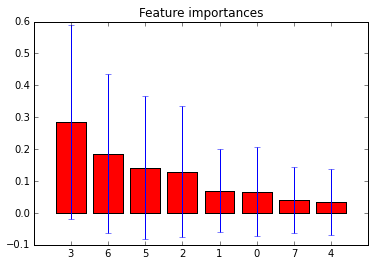

In [12]:
importances, meanaccuracy = doforest(prex[:,:-4], prey[:,2], prefeat[:-4], "preLANGUAGE_forest")

In [13]:
name = "preOPTIC"
deficit = 3
print preylabel[deficit]
dotree(prex, prey[:,deficit],prefeat, name)
print sum(prey[:,deficit])
#IFrame(name+'.pdf',width=700,height=500)

pre_vision_def
2.0


In [14]:
name = "shortMOTOR"
deficit = 0
print shortylabel[deficit]
dotree(shortx, shorty[:,deficit],shortfeat, name)
print sum(shorty[:,deficit])
IFrame(name+'.pdf',width=700,height=500)

short_motor_def
14.0


0.844949494949
[ 0.10792601  0.07764673  0.08611805  0.04474114  0.0258174   0.05438526
  0.17969642  0.06014674  0.35303271  0.          0.          0.01048955]
['short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc', 'short_cst', 'xtra', 'xtra', 'short_or']
1. feature 8 = short_cst (0.353033)
2. feature 6 = short_ifof (0.179696)
3. feature 0 = short_slf2 (0.107926)
4. feature 2 = short_arc (0.086118)
5. feature 1 = short_slf3 (0.077647)
6. feature 7 = short_unc (0.060147)
7. feature 5 = short_mdlf (0.054385)
8. feature 3 = short_slftp (0.044741)
9. feature 4 = short_ilf (0.025817)
10. feature 11 = short_or (0.010490)
11. feature 10 = xtra (0.000000)
12. feature 9 = xtra (0.000000)


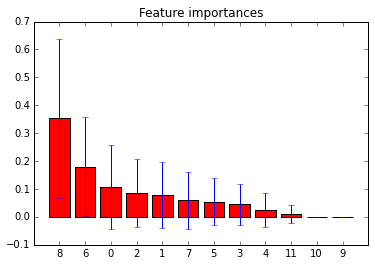

In [15]:
importances, meanaccuracy = doforest(shortx, shorty[:,0], shortfeat, "shortMOTOR_forest")

In [16]:
name = "shortSENSE"
deficit = 1
print shortylabel[deficit]
dotree(shortx, shorty[:,deficit],shortfeat, name)
print sum(shorty[:,deficit])
#IFrame(name+'.pdf',width=700,height=500)

short_sense_def
1.0


In [17]:
name = "shortLANGUAGE"
deficit = 2
print shortylabel[deficit]
dotree(shortx, shorty[:,deficit],shortfeat, name)
print sum(shorty[:,deficit])
IFrame(name+'.pdf',width=700,height=500)

short_lang_def
13.0


0.545454545455
[ 0.14570745  0.12476304  0.12366503  0.12675171  0.09465358  0.08877466
  0.16969725  0.12598728]
['short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc']
1. feature 6 = short_ifof (0.169697)
2. feature 0 = short_slf2 (0.145707)
3. feature 3 = short_slftp (0.126752)
4. feature 7 = short_unc (0.125987)
5. feature 1 = short_slf3 (0.124763)
6. feature 2 = short_arc (0.123665)
7. feature 4 = short_ilf (0.094654)
8. feature 5 = short_mdlf (0.088775)


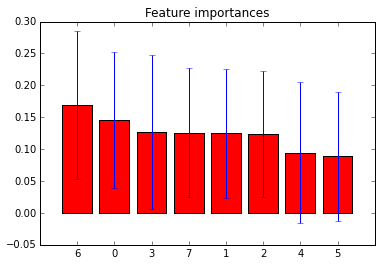

In [18]:
importances, meanaccuracy = doforest(shortx[:,:-4], shorty[:,2], shortfeat[:-4], "shortLANGUAGE_forest")

In [19]:
name = "shortOPTIC"
deficit = 3
print shortylabel[deficit]
dotree(shortx, shorty[:,deficit],shortfeat, name)
print sum(shorty[:,deficit])
IFrame(name+'.pdf',width=700,height=500)

short_vision_def
4.0


0.880808080808
[ 0.03579426  0.0378552   0.09296438  0.1317442   0.07815893  0.06345201
  0.08426738  0.08452633  0.04225878  0.          0.          0.33497852]
['short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc', 'short_cst', 'xtra', 'xtra', 'short_or']
1. feature 11 = short_or (0.334979)
2. feature 3 = short_slftp (0.131744)
3. feature 2 = short_arc (0.092964)
4. feature 7 = short_unc (0.084526)
5. feature 6 = short_ifof (0.084267)
6. feature 4 = short_ilf (0.078159)
7. feature 5 = short_mdlf (0.063452)
8. feature 8 = short_cst (0.042259)
9. feature 1 = short_slf3 (0.037855)
10. feature 0 = short_slf2 (0.035794)
11. feature 10 = xtra (0.000000)
12. feature 9 = xtra (0.000000)


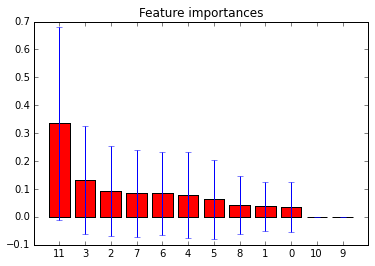

In [20]:
importances, meanaccuracy = doforest(shortx, shorty[:,3], shortfeat, "shortOPTIC_forest")

In [21]:
name = "longMOTOR"
deficit = 0
print longylabel[deficit]
dotree(longx, longy[:,deficit],longfeat, name)
print sum(longy[:,deficit])
IFrame(name+'.pdf',width=700,height=500)

long_motor_def
7.0


0.756060606061
[ 0.18370918  0.10936618  0.14512578  0.06893     0.03039443  0.04362238
  0.16679937  0.04412025  0.20111737  0.          0.          0.00681505]
['long_slf2', 'long_slf3', 'long_arc', 'long_slftp', 'long_ilf', 'long_mdlf', 'long_ifof', 'long_unc', 'long_cst', 'xtra', 'xtra', 'long_or']
1. feature 8 = long_cst (0.201117)
2. feature 0 = long_slf2 (0.183709)
3. feature 6 = long_ifof (0.166799)
4. feature 2 = long_arc (0.145126)
5. feature 1 = long_slf3 (0.109366)
6. feature 3 = long_slftp (0.068930)
7. feature 7 = long_unc (0.044120)
8. feature 5 = long_mdlf (0.043622)
9. feature 4 = long_ilf (0.030394)
10. feature 11 = long_or (0.006815)
11. feature 10 = xtra (0.000000)
12. feature 9 = xtra (0.000000)


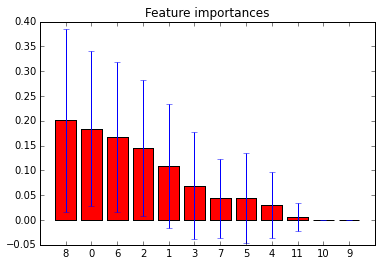

In [22]:
importances, meanaccuracy = doforest(longx, longy[:,0], longfeat, "longMOTOR_forest")

In [23]:
name = "longSENSE"
deficit = 1
print longylabel[deficit]
dotree(longx, longy[:,deficit],longfeat, name)
print sum(longy[:,deficit])
#IFrame(name+'.pdf',width=700,height=500)

long_sense_def
1.0


In [24]:
name = "longLANGUAGE"
deficit = 2
print longylabel[deficit]
dotree(longx, longy[:,deficit],longfeat, name)
print sum(longy[:,deficit])
IFrame(name+'.pdf',width=700,height=500)

long_lang_def
7.0


0.756060606061
[ 0.14013658  0.10159257  0.13619491  0.24571036  0.05414571  0.11635357
  0.13836144  0.06750485]
['long_slf2', 'long_slf3', 'long_arc', 'long_slftp', 'long_ilf', 'long_mdlf', 'long_ifof', 'long_unc']
1. feature 3 = long_slftp (0.245710)
2. feature 0 = long_slf2 (0.140137)
3. feature 6 = long_ifof (0.138361)
4. feature 2 = long_arc (0.136195)
5. feature 5 = long_mdlf (0.116354)
6. feature 1 = long_slf3 (0.101593)
7. feature 7 = long_unc (0.067505)
8. feature 4 = long_ilf (0.054146)


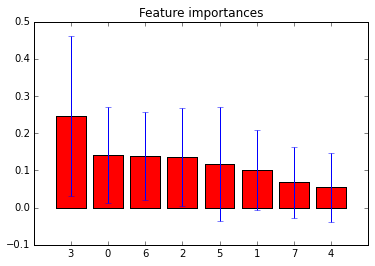

In [25]:
importances, meanaccuracy = doforest(longx[:,:-4], longy[:,2], longfeat[:-4], "longLANGUAGE_forest")

In [26]:
name = "longOPTIC"
deficit = 3
print longylabel[deficit]
dotree(longx, longy[:,deficit],longfeat, name)
print sum(longy[:,deficit])
#IFrame(name+'.pdf',width=700,height=500)

long_vision_def
2.0


In [27]:
#importances, meanaccuracy = doforest(longx, longy[:,3], longfeat, "longOPTIC_forest")